### 단어 임베딩 (Word Embedding)

단어 임베딩(Word Embedding)이란 텍스트를 구성하는 하나의 단어를 수치화하는 방법의 일종이다.

텍스트 분석에서 흔히 사용하는 방식은 단어 하나에 인덱스 정수를 할당하는 Bag of Words 방법이다. 이 방법을 사용하면 문서는 단어장에 있는 단어의 갯수와 같은 크기의 벡터가 되고 단어장의 각 단어가 그 문서에 나온 횟수만큼 벡터의 인덱스 위치의 숫자를 증가시킨다.

즉 단어장이 "I", "am", "a", "boy", "girl" 다섯개의 단어로 이루어진 경우 각 단어에 다음과 같이 숫자를 할당한다.

- "I": 0
- "am": 1
- "a": 2
- "boy": 3
- "girl": 4

이 때 "I am a girl"이라는 문서는 다음과 같이 벡터로 만들 수 있다.
$$ [1 1 1 0 1] $$

단어 임베딩은 하나의 단어를 하나의 인덱스 정수가 아니라 실수 벡터로 나타낸다. 예를 들어 2차원 임베딩을 하는 경우 다음과 같은 숫자 벡터가 될 수 있다.

- "I": (0.3, 0.2)
- "am": (0.1, 0.8)
- "a": (0.5, 0.6)
- "boy": (0.2, 0.9)
- "girl": (0.4, 0.7)

단어 임베딩이 된 경우에는 각 단어 벡터를 합치거나(concatenation) 더하는(averaging normalized Bag of Words) 방식으로 전체 문서의 벡터 표현을 구한다.

### Feed-Forward 신경망 언어 모형 (Neural Net Language Model)

이러한 단어 임베딩은 신경망을 이용하여 언어 모형을 만들려는 시도에서 나왔다. 자세한 내용은 다음 논문을 참고한다.

- "A Neural Probabilistic Language Model", Bengio, et al. 2003
    - http://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

- "Efficient Estimation of Word Representations in Vector Space", Mikolov et al. 2013
    - https://arxiv.org/pdf/130i.378lv3.pdf

- "word2vec Parameter Learning Explained", Xin Rong,
    - http://www-personal.umich.edu/~ronxin.pdf/w2vexp.pdf

$V$개의 단어를 가지는 단어장이 있을 때, 단어를 BOW 방식으로 크기 $V$인 벡터로 만든 다음 다음 그림과 같이 하나의 은닉층(Hidden Layer)을 가지는 신경망을 사용하여 특징 단어 열(word sequence)이 주어졌을 때 다음에 나올 단어를 예측하는 문제를 생각해 보자. 입력과 출력은 모두 BOW 방식으로 인코딩되어 있다.

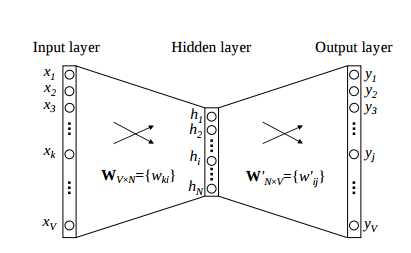
<center><b>그림 20.5.1 : 신경망 언어 모형</b></center>

---

입력 $x$가 들어가면 입력 가중치 행렬 $W$이 곱해져서 은닉층 벡터 $h$가 되는데 $x$가 one-hot-encoding된 값이므로 $h$ 벡터는 입력 가중치 행렬 $W$의 행 하나 $w_1$에 대응된다.

$$ h = \sigma(Wx) $$

여기에서 $i$는 입력 벡터 $x$의 값이 1인 원소의 인덱스이다. 즉, BOW 단어장에서 $i$번째 단어를 뜻한다.

이 $w_1$ 벡터 값을 해당 단어에 대한 분산 표현 (distributed reprsentation), 벡터 표현 (vector representation) 또는 단어 임베딩 (word embedding)이라고 한다.

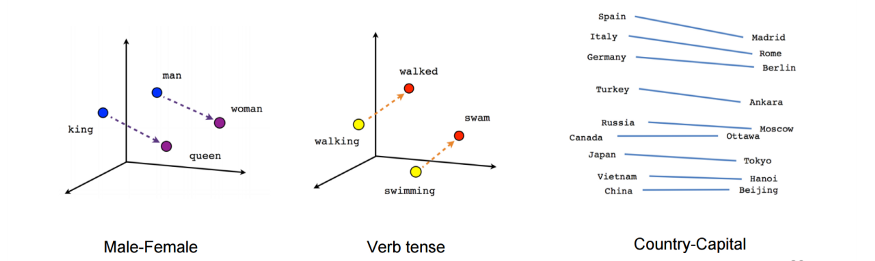
<center><b>그림 20.5.2 : 단어 임베딩</b></center>

---

### CBOW (Continuous Bag of Words) Embedding

위의 방식은 하나의 단어로부터 다음에 오는 단어를 예측하는 문제이다. 이러한 문제를 단어 하나짜리 문맥(single-word context)를 가진다고 한다.

CBOW (Continuous Bag of Words) 방식은 복수 단어 문제 (multi-word context)에 대한 문제, 즉 여러개의 단어를 나열한 뒤 이와 관련된 단어를 추정하는 문제이다. 즉, 문자에서 나오는 $n$개의 단어 열로부터 다음 단어를 예측하는 문제가 된다. 예를 들어

    the quick brown fox jumped over the lazy dog

라는 문장에서 (the, quick, brown) 이라는 문맥이 주어지면 fox라는 단어를 예측해야 한다.

CBOW는 다음과 같은 신경망 구조를 가진다. 여기에서 각 문맥 단어를 은닉층으로 투사하는 가중치 행렬은 모든 단어에 대해 공통으로 사용한다.

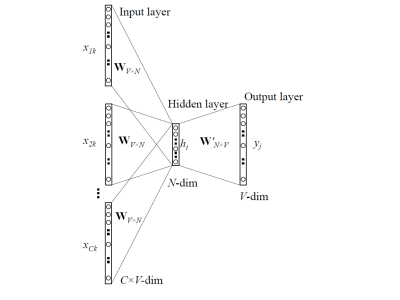
<center><b>그림 20.5.3 : CBOW</b></center>

---

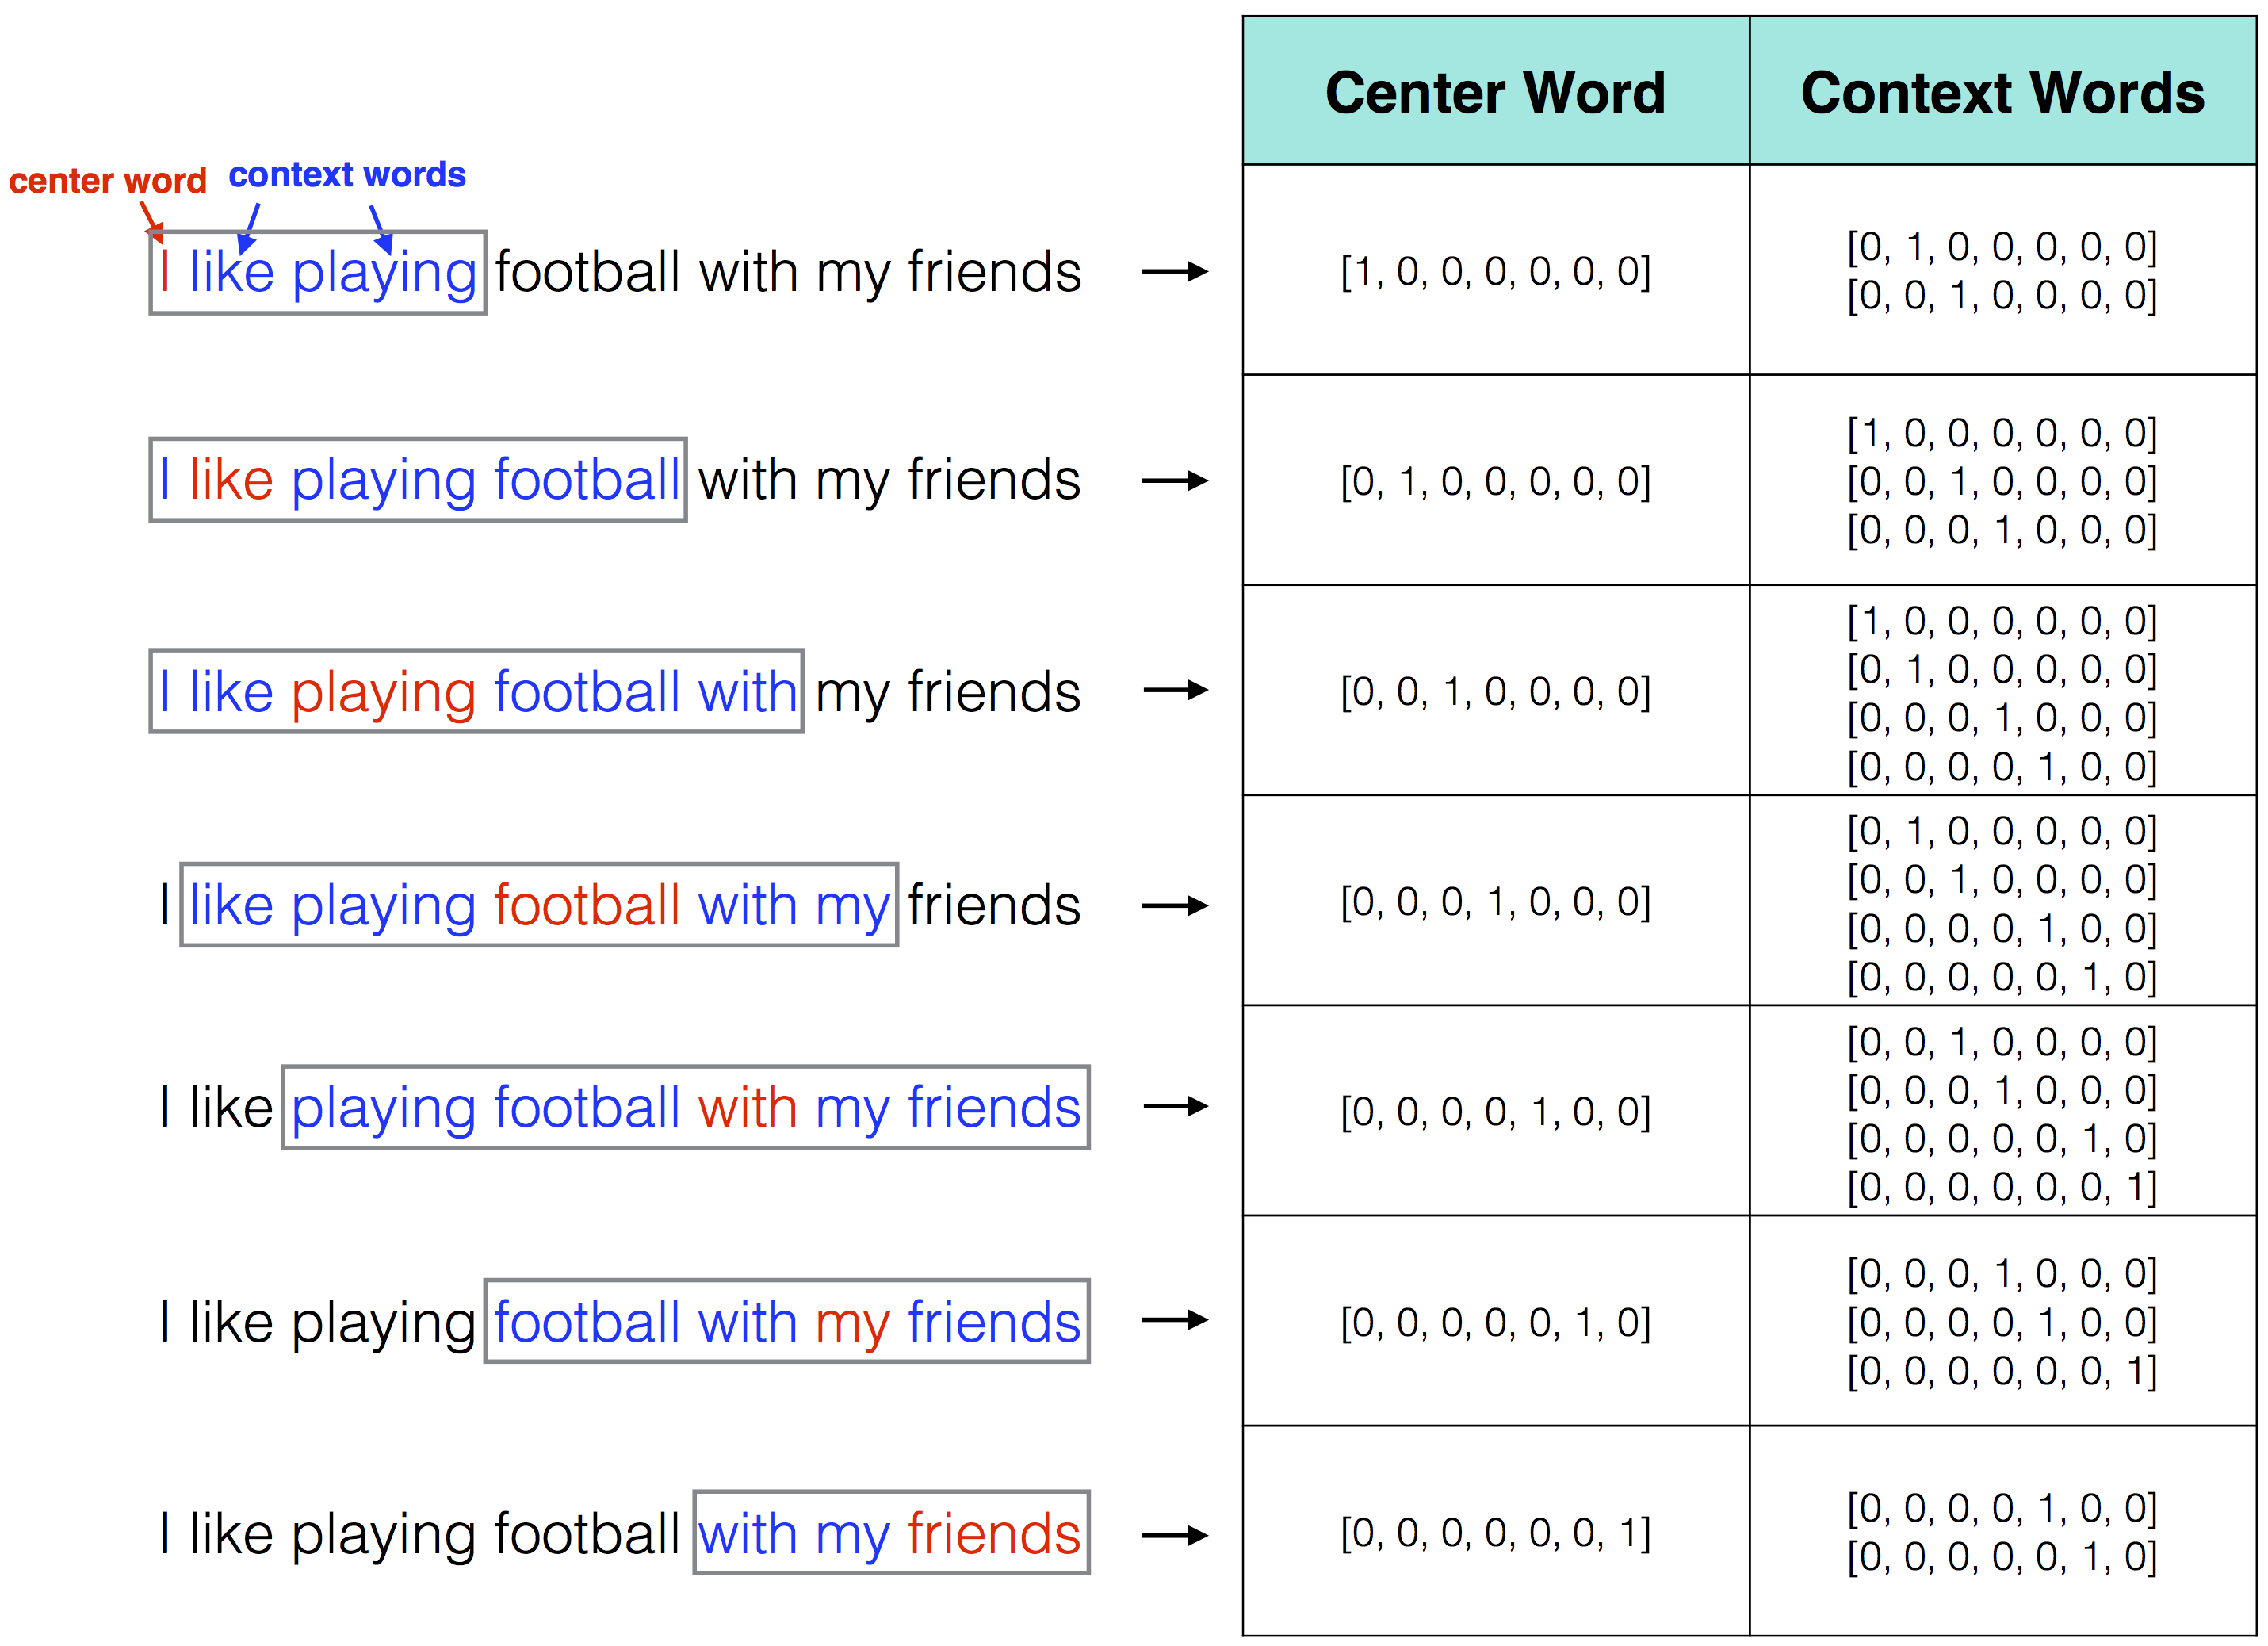
<center><b>그림 20.5.4 : CBOW 임베딩 예 (Find the center word given the context words)</b></center>

---

### Skip-Gram Embedding

Skip-Gram 방식은 CBOW 방식과 반대로 특정한 단어로부터 문맥이 될 수 있는 단어를 예측한다. 보통 입력 단어 주변의 $k$개 단어를 문맥으로 보고 예측 모형을 만드는데 이 $k$ 값을 window size라고 한다.

위 문장에서 window size $k = 1$인 경우,

- quick -> the
- quick -> brown
- brown -> quick
- brown -> fox

과 같은 관계를 예측할 수 있어야 한다.

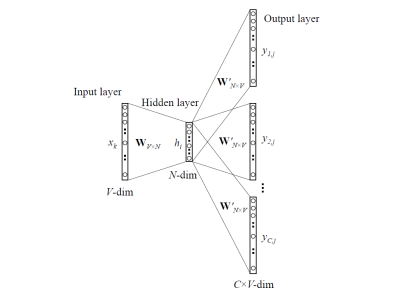
<center><b>그림 20.5.5 : Skip-Gram (Find the context words given the center word)</b></center>

---

### word2vec

word2vec은 CBOW 방식과 Skip-Gram 방식의 단어 임베딩을 구현한 C++ 라이브러리다. 구글에 있떤 Mikolov 등이 개발하였다. 이 라이브러리는 기본적인 임베딩 기법에 subsampling, negative sampling 등의 기법을 추가하여 학습 속도롤 향상하였다. 파이썬에서는 gensim이라는 패키지에 word2Vec 이라는 클래스로 구현되어 있다.

nltk의 영화 감상 corpus를 기반으로 word2Vec 사용법을 살펴보자.

우선 단어 임베딩을 위한 코퍼스를 만든다. 코퍼스는 리스트의 리스트 형태로 구현되어야 한다. 내부 리스트는 하나의 문장을 이루는 단어 열이 된다.

In [4]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\윤성현\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [7]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [9]:
from gensim.models.word2vec import Word2Vec

In [10]:
model = Word2Vec(sentences)

트레이닝이 완료되면 init_sims 명령으로 필요없는 메모리는 unload 시킨다.

In [11]:
model.init_sims(replace=True)

이제 이 모형에서 다음과 같은 메서드를 사용할 수 있다. 보다 자세한 내용은 https://radimrehurek.com/gensim/models/word2vec.html 를 참조한다.

- similarity : 두 단어의 유사도 계산
- most_similar : 가장 유사한 단어를 출력

In [12]:
model.wv.similarity('actor', 'actress')

0.86213696

In [13]:
model.wv.similarity('he', 'she')

0.8609917

In [14]:
model.wv.similarity('actor', 'she')

0.24079901

In [15]:
model.wv.most_similar('accident')

[('plane', 0.8812390565872192),
 ('museum', 0.8605832457542419),
 ('meeting', 0.8510255813598633),
 ('ball', 0.8451675176620483),
 ('church', 0.8421216607093811),
 ('conversation', 0.8406933546066284),
 ('evening', 0.8384662866592407),
 ('elevator', 0.8376414179801941),
 ('automobile', 0.8369473218917847),
 ('cab', 0.8360077142715454)]

most_similar 메서드는 positive 인수와 negative 인수를 사용하여 다음과 같은 단어간 관계도 찾을 수 있다.

    she + (actor - actress) = he

In [16]:
model.wv.most_similar(positive=['she', 'actor'], negative=['actress'], topn=1)

[('he', 0.8412891626358032)]

이번에는 네이버 영화 감상 코퍼스를 사용하여 한국어 단어 임베딩을 해보자.

In [17]:
import codecs

def read_data(filename):
    with codecs.open(filename, encoding='utf-8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]    # header 제외
    return data

train_data = read_data('ratings_train.txt')

In [19]:
from konlpy.tag import Okt
tagger = Okt()

def tokenize(doc):
    return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]

train_docs = [row[1] for row in train_data]

In [20]:
sentences = [tokenize(d) for d in train_docs]

In [21]:
from gensim.models import word2vec

In [22]:
model = word2vec.Word2Vec(sentences)
model.init_sims(replace=True)

In [23]:
model.wv.similarity(*tokenize(u'배우 여배우'))

0.73638356

In [24]:
model.wv.similarity(*tokenize(u'배우 남자'))

0.27966467

    남자 + (여배우 - 배우) = 여자

In [25]:
from konlpy.utils import pprint
pprint(model.wv.most_similar(positive=tokenize(u'남자 여배우'), negative=tokenize(u'배우'), topn=1))

[('여자/Noun', 0.8264985084533691)]


더 많은 한국어 코퍼스를 사용한 단어 인메딩 모형은 다음 웹사이트에서 테스트해 볼 수 있다.
- http://w.elnn.kr/